In [2]:
# Importar las librerías necesarias
# Manejo de datos
import numpy as np

# Guardar y cargar modelos
import joblib

# Usar random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Mostrar la matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## MFCC

In [3]:
# Cargar los datos de entrenamiento
X_train_mfcc = np.load('data_preprocessed/X_train_mfcc.npy')
y_train_mfcc = np.load('data_preprocessed/y_train_mfcc.npy')

# Cargar los datos de prueba
X_test_mfcc = np.load('data_preprocessed/X_test_mfcc.npy')
y_test_mfcc = np.load('data_preprocessed/y_test_mfcc.npy')

In [4]:
# Crear y entrenar el modelo
clf_mfcc = RandomForestClassifier(n_estimators=100, random_state=42)
clf_mfcc.fit(X_train_mfcc, y_train_mfcc)

# Predecir en el conjunto de prueba
y_pred_mfcc = clf_mfcc.predict(X_test_mfcc)

# Evaluar el modelo
print("Random Forest con MFCC - Precisión en prueba:", accuracy_score(y_test_mfcc, y_pred_mfcc))
print("Reporte de clasificación (MFCC):")
print(classification_report(y_test_mfcc, y_pred_mfcc))

# Guardar el modelo entrenado con MFCC
joblib.dump(clf_mfcc, 'models/random_forest/random_forest_mfcc_model.pkl')

Random Forest con MFCC - Precisión en prueba: 0.7760034527406129
Reporte de clasificación (MFCC):
              precision    recall  f1-score   support

           0       0.71      0.90      0.80      2264
           1       0.88      0.65      0.75      2370

    accuracy                           0.78      4634
   macro avg       0.80      0.78      0.77      4634
weighted avg       0.80      0.78      0.77      4634



['models/random_forest/random_forest_mfcc_model.pkl']

La precisión conseguida es de 0.77600

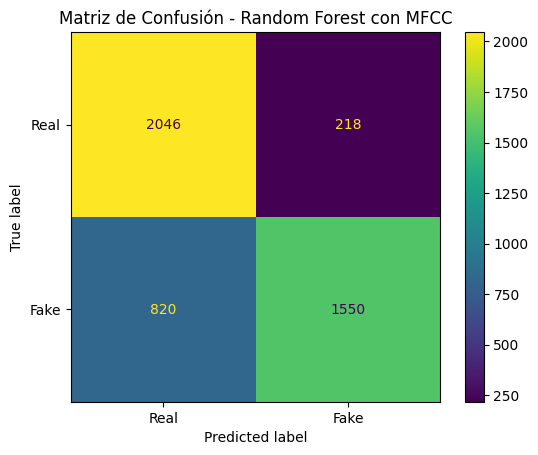

In [6]:
# Matriz de confusión - Random forest con MFCC
cm_mfcc = confusion_matrix(y_test_mfcc, y_pred_mfcc)
disp_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_mfcc, display_labels=['Real', 'Fake'])
disp_mfcc.plot()
plt.title('Matriz de Confusión - Random Forest con MFCC')
plt.show()

## Spectrogram

No se ha implementado ya que pesa considerablemente más que el MFCC y en pruebas previas no se ha determinado una mejora significativa en la precisión.

El código presentado a continuación funciona con el espectrograma, pero no se ha ejecutado por carga computacional.

In [ ]:
# Cargar los datos de entrenamiento
y_train_spectrogram = np.load('data_preprocessed/y_train_spectrogram.npy')

# Cargar los datos de prueba
y_test_spectrogram = np.load('data_preprocessed/y_test_spectrogram.npy')

# Cargar los datos con PCA ya aplicado 
X_train_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_train_spectrogram_pca.npy')
X_test_spectrogram_pca = np.load('data_preprocessed/scalers_PCA/X_test_spectrogram_pca.npy')

In [ ]:
# Crear y entrenar el modelo
clf_spectrogram = RandomForestClassifier(n_estimators=100, random_state=42)
clf_spectrogram.fit(X_train_spectrogram_pca, y_train_spectrogram)

# Predecir en el conjunto de prueba
y_pred_spectrogram = clf_spectrogram.predict(X_test_spectrogram_pca)

# Evaluar el modelo
print("Random Forest con Espectrograma - Precisión en prueba:", accuracy_score(y_test_spectrogram, y_pred_spectrogram))
print("Reporte de clasificación (Espectrograma):")
print(classification_report(y_test_spectrogram, y_pred_spectrogram))

# Guardar el modelo entrenado con espectrogramas
joblib.dump(clf_spectrogram, 'models/random_forest/random_forest_spectrogram_model.pkl')

In [ ]:
# Matriz de confusión - Random forest con Espectrograma
cm_spectrogram = confusion_matrix(y_test_spectrogram, y_pred_spectrogram)
disp_mfcc = ConfusionMatrixDisplay(confusion_matrix=cm_spectrogram, display_labels=['Real', 'Fake'])
disp_mfcc.plot()
plt.title('Matriz de Confusión - Random Forest con Espectrograma')
plt.show()